# Call Center Optimization
- Using the call center data provided, your task is to develop a forecasting model
to predict future call volumes over the next quarter. 
- Additionally, you are to analyze the data for patterns that could inform better resource allocation,
identify peak call times, and understand the distribution of issue categories over
time.

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore specific type of warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('Call_Center_Data.csv')
data.head(5)

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


In [4]:
data.shape

(1251, 9)

In [5]:
data.drop('Index',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Incoming Calls              1251 non-null   int64 
 1   Answered Calls              1251 non-null   int64 
 2   Answer Rate                 1251 non-null   object
 3   Abandoned Calls             1251 non-null   int64 
 4   Answer Speed (AVG)          1251 non-null   object
 5   Talk Duration (AVG)         1251 non-null   object
 6   Waiting Time (AVG)          1251 non-null   object
 7   Service Level (20 Seconds)  1251 non-null   object
dtypes: int64(3), object(5)
memory usage: 78.3+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Incoming Calls,1251.0,198.539568,156.534195,5.0,123.0,177.0,233.0,1575.0
Answered Calls,1251.0,176.845723,115.612080,5.0,114.0,166.0,214.5,909.0
Abandoned Calls,1251.0,21.693845,59.671955,0.0,3.0,8.0,16.0,704.0


In [8]:
data['Answer Speed (AVG)'] = pd.to_datetime(data['Answer Speed (AVG)'])
data

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01%,13,2024-04-27 00:00:17,0:02:14,0:02:45,76.28%
1,200,182,91.00%,18,2024-04-27 00:00:20,0:02:22,0:06:55,72.73%
2,216,198,91.67%,18,2024-04-27 00:00:18,0:02:38,0:03:50,74.30%
3,155,145,93.55%,10,2024-04-27 00:00:15,0:02:29,0:03:12,79.61%
4,37,37,100.00%,0,2024-04-27 00:00:03,0:02:06,0:00:35,97.30%
...,...,...,...,...,...,...,...,...
1246,191,184,96.34%,7,2024-04-27 00:00:07,0:02:50,0:01:56,92.55%
1247,212,209,98.58%,3,2024-04-27 00:00:10,0:02:51,0:01:45,89.10%
1248,210,203,96.67%,7,2024-04-27 00:00:12,0:03:22,0:03:52,85.24%
1249,167,159,95.21%,8,2024-04-27 00:00:16,0:03:16,0:02:42,83.03%


In [9]:
data['Talk Duration (AVG)'] = pd.to_datetime(data['Talk Duration (AVG)'])
data['Waiting Time (AVG)'] = pd.to_datetime(data['Waiting Time (AVG)'])


In [10]:
data['Answer Rate'] = data['Answer Rate'].apply(lambda x: x.split('%')[0]).astype(float)
data

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01,13,2024-04-27 00:00:17,2024-04-27 00:02:14,2024-04-27 00:02:45,76.28%
1,200,182,91.00,18,2024-04-27 00:00:20,2024-04-27 00:02:22,2024-04-27 00:06:55,72.73%
2,216,198,91.67,18,2024-04-27 00:00:18,2024-04-27 00:02:38,2024-04-27 00:03:50,74.30%
3,155,145,93.55,10,2024-04-27 00:00:15,2024-04-27 00:02:29,2024-04-27 00:03:12,79.61%
4,37,37,100.00,0,2024-04-27 00:00:03,2024-04-27 00:02:06,2024-04-27 00:00:35,97.30%
...,...,...,...,...,...,...,...,...
1246,191,184,96.34,7,2024-04-27 00:00:07,2024-04-27 00:02:50,2024-04-27 00:01:56,92.55%
1247,212,209,98.58,3,2024-04-27 00:00:10,2024-04-27 00:02:51,2024-04-27 00:01:45,89.10%
1248,210,203,96.67,7,2024-04-27 00:00:12,2024-04-27 00:03:22,2024-04-27 00:03:52,85.24%
1249,167,159,95.21,8,2024-04-27 00:00:16,2024-04-27 00:03:16,2024-04-27 00:02:42,83.03%


In [11]:
data['Service Level (20 Seconds)'] = data['Service Level (20 Seconds)'].apply(lambda x: x.split('%')[0]).astype(float)
data

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01,13,2024-04-27 00:00:17,2024-04-27 00:02:14,2024-04-27 00:02:45,76.28
1,200,182,91.00,18,2024-04-27 00:00:20,2024-04-27 00:02:22,2024-04-27 00:06:55,72.73
2,216,198,91.67,18,2024-04-27 00:00:18,2024-04-27 00:02:38,2024-04-27 00:03:50,74.30
3,155,145,93.55,10,2024-04-27 00:00:15,2024-04-27 00:02:29,2024-04-27 00:03:12,79.61
4,37,37,100.00,0,2024-04-27 00:00:03,2024-04-27 00:02:06,2024-04-27 00:00:35,97.30
...,...,...,...,...,...,...,...,...
1246,191,184,96.34,7,2024-04-27 00:00:07,2024-04-27 00:02:50,2024-04-27 00:01:56,92.55
1247,212,209,98.58,3,2024-04-27 00:00:10,2024-04-27 00:02:51,2024-04-27 00:01:45,89.10
1248,210,203,96.67,7,2024-04-27 00:00:12,2024-04-27 00:03:22,2024-04-27 00:03:52,85.24
1249,167,159,95.21,8,2024-04-27 00:00:16,2024-04-27 00:03:16,2024-04-27 00:02:42,83.03


In [12]:
data['Answer Speed (AVG)'] = data['Answer Speed (AVG)'].dt.hour*60 + data['Answer Speed (AVG)'].dt.minute + data['Answer Speed (AVG)'].dt.second/60
data

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01,13,0.283333,2024-04-27 00:02:14,2024-04-27 00:02:45,76.28
1,200,182,91.00,18,0.333333,2024-04-27 00:02:22,2024-04-27 00:06:55,72.73
2,216,198,91.67,18,0.300000,2024-04-27 00:02:38,2024-04-27 00:03:50,74.30
3,155,145,93.55,10,0.250000,2024-04-27 00:02:29,2024-04-27 00:03:12,79.61
4,37,37,100.00,0,0.050000,2024-04-27 00:02:06,2024-04-27 00:00:35,97.30
...,...,...,...,...,...,...,...,...
1246,191,184,96.34,7,0.116667,2024-04-27 00:02:50,2024-04-27 00:01:56,92.55
1247,212,209,98.58,3,0.166667,2024-04-27 00:02:51,2024-04-27 00:01:45,89.10
1248,210,203,96.67,7,0.200000,2024-04-27 00:03:22,2024-04-27 00:03:52,85.24
1249,167,159,95.21,8,0.266667,2024-04-27 00:03:16,2024-04-27 00:02:42,83.03


In [13]:
data['Talk Duration (AVG)'] = data['Talk Duration (AVG)'].dt.hour*60 + data['Talk Duration (AVG)'].dt.minute + data['Talk Duration (AVG)'].dt.second/60
data['Waiting Time (AVG)'] = data['Waiting Time (AVG)'].dt.hour*60 + data['Waiting Time (AVG)'].dt.minute + data['Waiting Time (AVG)'].dt.second/60

In [11]:
data

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,217,204,94.01,13,0.283333,2.233333,2.750000,76.28
1,200,182,91.00,18,0.333333,2.366667,6.916667,72.73
2,216,198,91.67,18,0.300000,2.633333,3.833333,74.30
3,155,145,93.55,10,0.250000,2.483333,3.200000,79.61
4,37,37,100.00,0,0.050000,2.100000,0.583333,97.30
...,...,...,...,...,...,...,...,...
1246,191,184,96.34,7,0.116667,2.833333,1.933333,92.55
1247,212,209,98.58,3,0.166667,2.850000,1.750000,89.10
1248,210,203,96.67,7,0.200000,3.366667,3.866667,85.24
1249,167,159,95.21,8,0.266667,3.266667,2.700000,83.03


### As the dataset don't have the time component but the data is on the daily basis from this info i have created a date column

In [14]:
import pandas as pd
from datetime import timedelta

# Create a date range with 1251 daily data points
dates = pd.date_range(end='today', periods=1251)

# Add the date range to the DataFrame as a new column
dates = dates.normalize()

# Add the date range to the DataFrame as a new column
data['Date'] = dates

# Convert the 'Date' column to string format to remove the time part
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')



In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data.head(5)

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Date
0,217,204,94.01,13,0.283333,2.233333,2.750000,76.28,2020-11-24
1,200,182,91.00,18,0.333333,2.366667,6.916667,72.73,2020-11-25
2,216,198,91.67,18,0.300000,2.633333,3.833333,74.30,2020-11-26
3,155,145,93.55,10,0.250000,2.483333,3.200000,79.61,2020-11-27
4,37,37,100.00,0,0.050000,2.100000,0.583333,97.30,2020-11-28


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Incoming Calls              1251 non-null   int64         
 1   Answered Calls              1251 non-null   int64         
 2   Answer Rate                 1251 non-null   float64       
 3   Abandoned Calls             1251 non-null   int64         
 4   Answer Speed (AVG)          1251 non-null   float64       
 5   Talk Duration (AVG)         1251 non-null   float64       
 6   Waiting Time (AVG)          1251 non-null   float64       
 7   Service Level (20 Seconds)  1251 non-null   float64       
 8   Date                        1251 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 88.1 KB


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def hist_box(data,feature,figsize=(12,7),kde=False,bins=None):
    f,(ax_box2,ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

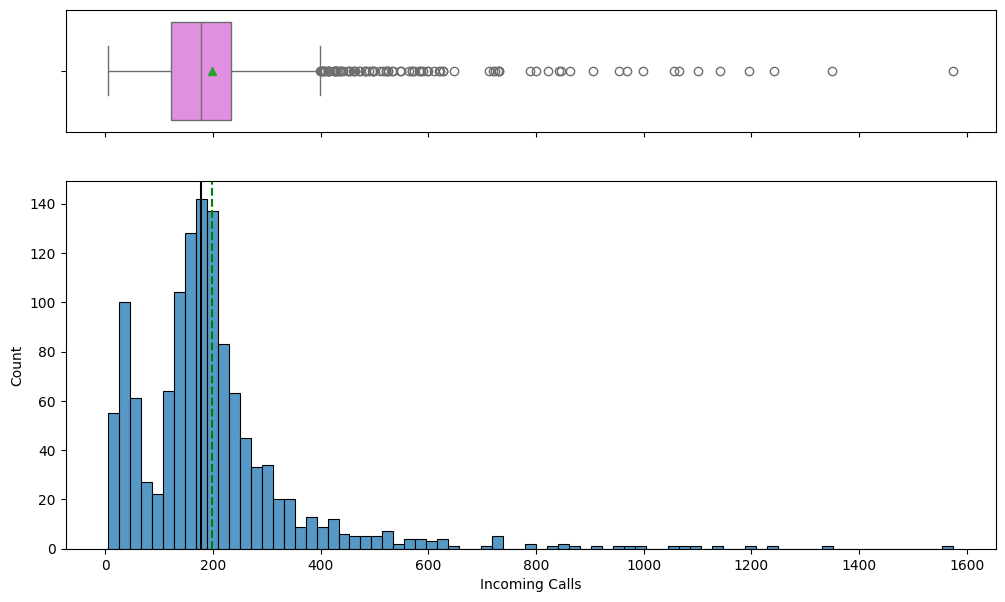

In [18]:
hist_box(data,'Incoming Calls')

### Handling Outliers

In [19]:
data = data[data['Incoming Calls']<=400]

In [20]:
data.shape

(1163, 9)

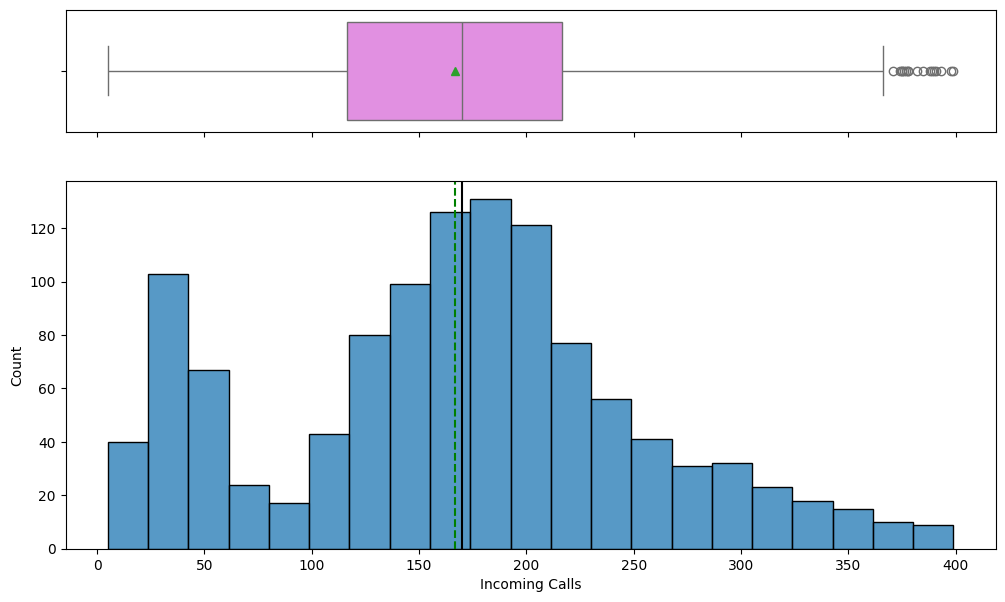

In [21]:
hist_box(data,'Incoming Calls')

### Incoming calls are right skewed in nature with outliers

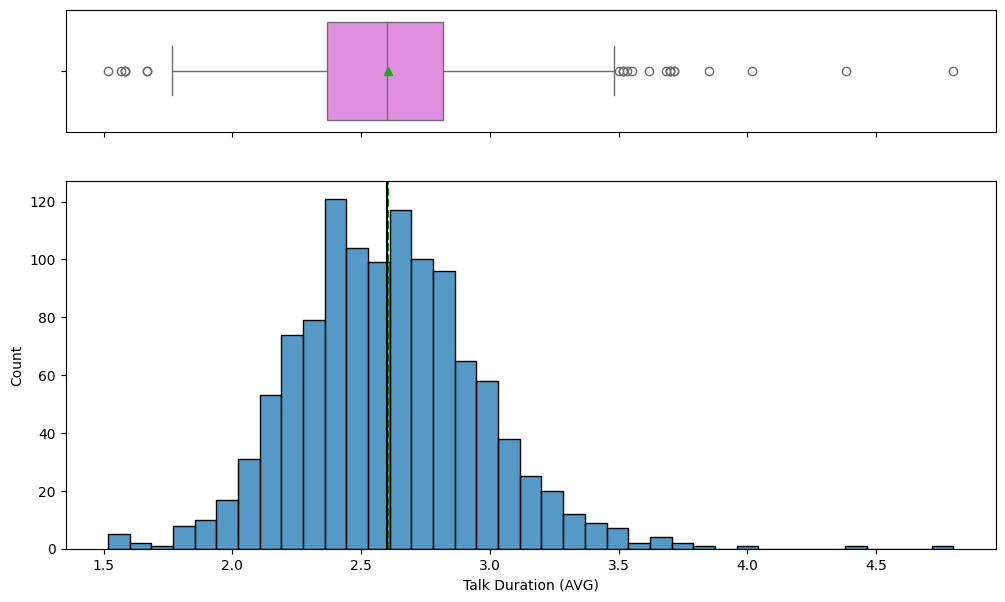

In [22]:
hist_box(data,'Talk Duration (AVG)')

### Talk Duration is normally distributed with some outliers

In [23]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Incoming Calls,1163.0,166.636285,5.0,116.5,170.0,216.5,399.0,86.232779
Answered Calls,1163.0,155.8908,5.0,108.0,161.0,203.0,387.0,80.246271
Answer Rate,1163.0,93.952984,24.0,92.02,95.24,97.42,100.0,5.55811
Abandoned Calls,1163.0,10.745486,0.0,3.0,7.0,14.0,247.0,13.392932
Answer Speed (AVG),1163.0,0.354872,0.033333,0.2,0.333333,0.466667,3.216667,0.215584
Talk Duration (AVG),1163.0,2.602823,1.516667,2.366667,2.6,2.816667,4.8,0.359791
Waiting Time (AVG),1163.0,3.374979,0.05,1.925,2.9,4.308333,24.85,2.140967
Service Level (20 Seconds),1163.0,73.330585,0.0,63.45,75.59,85.0,100.0,15.471572
Date,1163,2022-07-27 17:31:12.742906368,2020-11-24 00:00:00,2021-09-15 12:00:00,2022-07-05 00:00:00,2023-06-30 12:00:00,2024-04-27 00:00:00,NaN


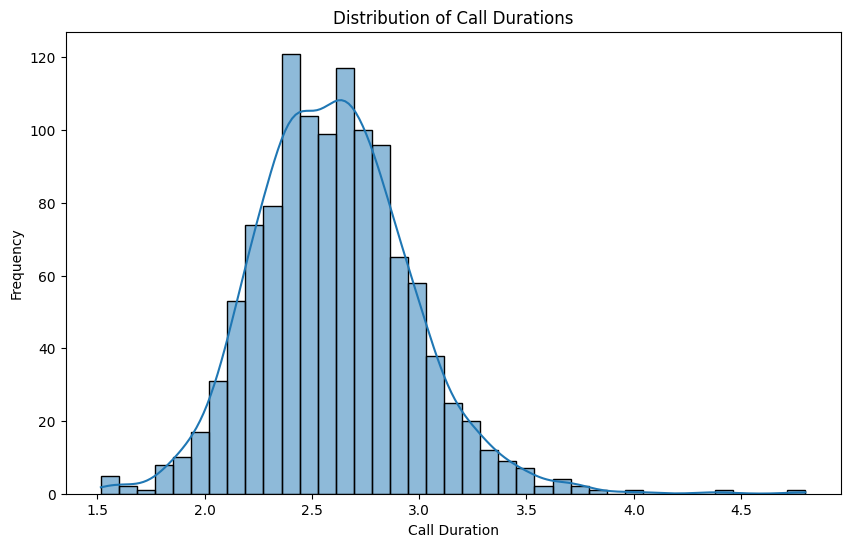

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = data.copy()


# Examine the distribution of call durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Talk Duration (AVG)'], kde=True)
plt.title('Distribution of Call Durations')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.show()



# Call Duration Analysis
- The distribution appears to be approximately normal (bell-shaped), which is characterized by a single peak and similar tails on either side of the peak.
- The majority of calls last around 2.5 to 3.0 minutes, as indicated by the peak of the distribution.
- There are fewer calls with shorter or longer durations, as shown by the lower bars on either side of the peak.


In [25]:
smoothed_values = data['Incoming Calls'].rolling(window=72).mean()
data['smoothed_values'] = smoothed_values
import plotly.graph_objs as go
import plotly.express as px
fig = px.line(data, x='Date', y='smoothed_values', title='Line Plot')

# Update layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Incoming calls')

# Show the plot
fig.show()

1. **Trend**: The graph shows an overall **decreasing trend** in the number of incoming calls over the years from **Jan 2021 to Jan 2024**. This could be due to various factors such as changes in marketing strategies, customer behavior, or service quality.

2. **Seasonality**: There is clear **seasonality** in the data. There are **peaks around July each year**, indicating a seasonal increase in incoming calls during this period. This could be due to seasonal factors like holidays or promotional events that lead to an increase in calls.



<Axes: >

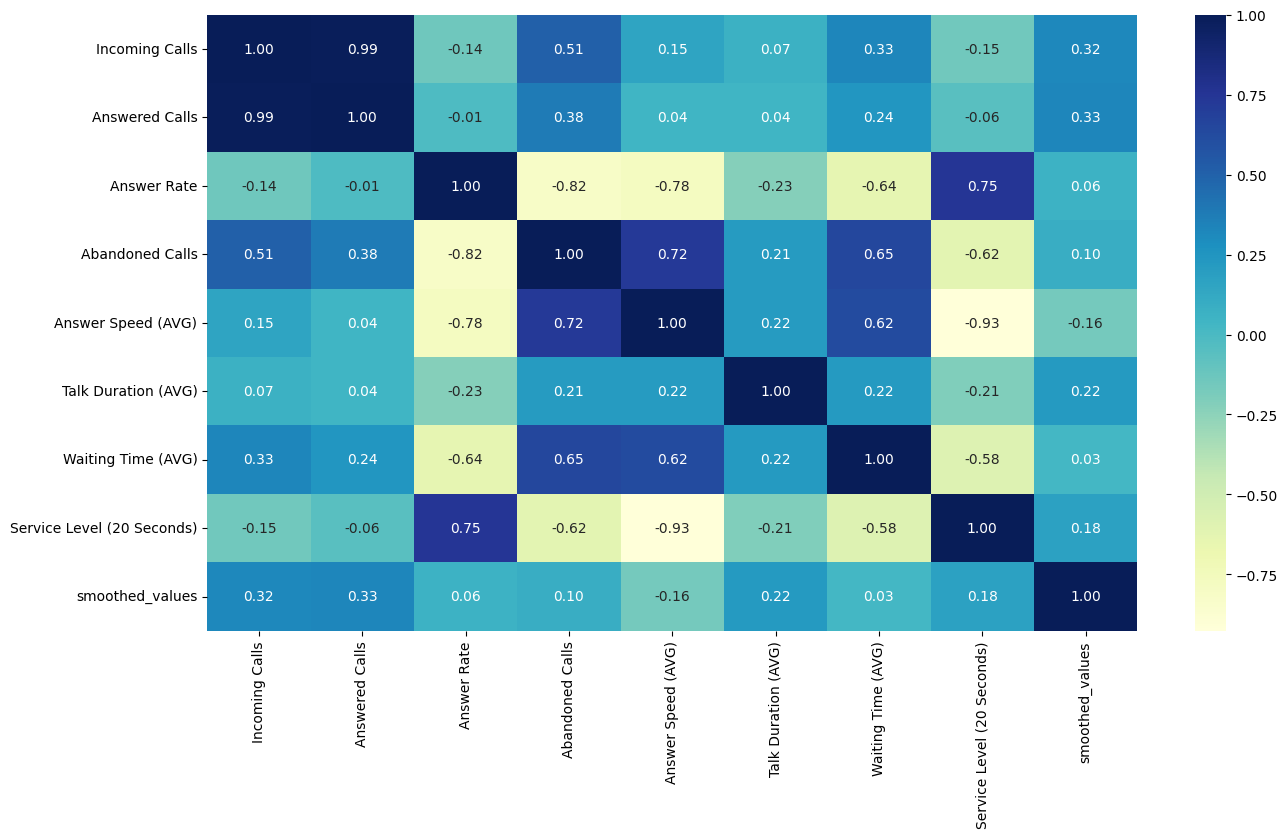

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(data[data.drop('Date',axis=1).columns].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')


- **Highly Correlated Features**:
  - **Incoming Calls & Answered Calls**: A correlation coefficient of **0.95** suggests a very strong positive relationship.
  - **Abandoned Calls & Answer Rate**: A correlation coefficient of **-0.81** indicates a strong negative relationship.
  - **Waiting Time (AVG) & Service Level (90 Seconds)**: A correlation coefficient of **-0.70** shows a notable negative relationship.

- **Low Correlated Features**:
  - **Incoming Calls & Talk Duration (AVG)**: A correlation coefficient of **0.20** implies a weak positive relationship.
  - **Answered Calls & Talk Duration (AVG)**: A correlation coefficient of **0.13** indicates a very weak positive relationship.
  - **Service Level (90 Seconds) & Talk Duration (AVG)**: A correlation coefficient of **-0.34** points to a weak negative relationship.

These correlations can help in understanding the relationships between different aspects of call center performance and in making informed decisions based on the data.



In [26]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['day_of_week'] = data['Date'].dt.day_name()
data.head(5)

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Date,smoothed_values,day,month,day_of_week
0,217,204,94.01,13,0.283333,2.233333,2.750000,76.28,2020-11-24,NaN,24,11,Tuesday
1,200,182,91.00,18,0.333333,2.366667,6.916667,72.73,2020-11-25,NaN,25,11,Wednesday
2,216,198,91.67,18,0.300000,2.633333,3.833333,74.30,2020-11-26,NaN,26,11,Thursday
3,155,145,93.55,10,0.250000,2.483333,3.200000,79.61,2020-11-27,NaN,27,11,Friday
4,37,37,100.00,0,0.050000,2.100000,0.583333,97.30,2020-11-28,NaN,28,11,Saturday


In [27]:
data.head(5)

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),Date,smoothed_values,day,month,day_of_week
0,217,204,94.01,13,0.283333,2.233333,2.750000,76.28,2020-11-24,NaN,24,11,Tuesday
1,200,182,91.00,18,0.333333,2.366667,6.916667,72.73,2020-11-25,NaN,25,11,Wednesday
2,216,198,91.67,18,0.300000,2.633333,3.833333,74.30,2020-11-26,NaN,26,11,Thursday
3,155,145,93.55,10,0.250000,2.483333,3.200000,79.61,2020-11-27,NaN,27,11,Friday
4,37,37,100.00,0,0.050000,2.100000,0.583333,97.30,2020-11-28,NaN,28,11,Saturday


In [27]:
# Define bins for call duration categories
bins = [0, 1.5, 3, float('inf')]
labels = ['low', 'moderate', 'high']

# Create a new column for call duration categories
data['Call Duration Category'] = pd.cut(data['Talk Duration (AVG)'], bins=bins, labels=labels)

# Print the first 5 rows of the DataFrame
print(data.head())

# Print the distribution of call duration categories
print(data['Call Duration Category'].value_counts())

   Incoming Calls  Answered Calls  Answer Rate  Abandoned Calls  \
0             217             204        94.01               13   
1             200             182        91.00               18   
2             216             198        91.67               18   
3             155             145        93.55               10   
4              37              37       100.00                0   

   Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  \
0            0.283333             2.233333            2.750000   
1            0.333333             2.366667            6.916667   
2            0.300000             2.633333            3.833333   
3            0.250000             2.483333            3.200000   
4            0.050000             2.100000            0.583333   

   Service Level (20 Seconds)       Date  smoothed_values  day  month  \
0                       76.28 2020-11-24              NaN   24     11   
1                       72.73 2020-11-25              

### After this we can see that Moderate category calls duration is more than high and low is having zero count

<Axes: xlabel='day_of_week', ylabel='Incoming Calls'>

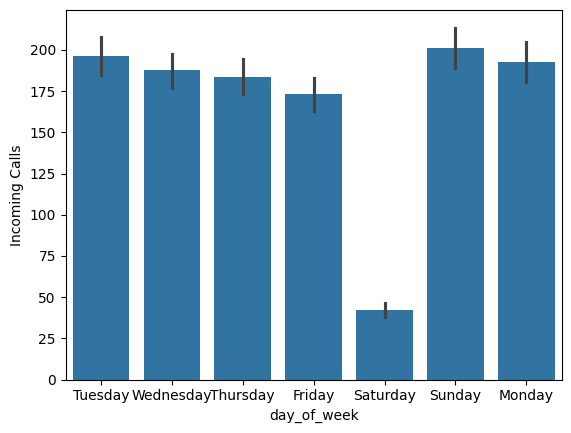

In [29]:
sns.barplot(data=data,x='day_of_week',y='Incoming Calls')

### From the plot we can see that most calls are on weekdays with sunday having maximum incoming calls and saturday having mimimum incoming calls

<Axes: xlabel='month', ylabel='Incoming Calls'>

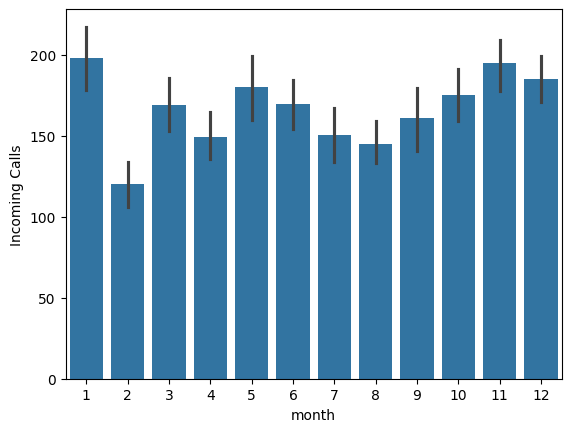

In [30]:
sns.barplot(data=data,x='month',y='Incoming Calls')

### from this plot we can see that in starting of the year in mid of the year and ending month of the year incoming calls volume are higher as compared to rest of the year

In [47]:
data

,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds),smoothed_values,day,month,day_of_week,Call Duration Category
Date,,,,,,,,,,,,,
2020-11-24,217,204,94.01,13,0.283333,2.233333,2.750000,76.28,NaN,24,11,Tuesday,moderate
2020-11-25,200,182,91.00,18,0.333333,2.366667,6.916667,72.73,NaN,25,11,Wednesday,moderate
2020-11-26,216,198,91.67,18,0.300000,2.633333,3.833333,74.30,NaN,26,11,Thursday,moderate
2020-11-27,155,145,93.55,10,0.250000,2.483333,3.200000,79.61,NaN,27,11,Friday,moderate
2020-11-28,37,37,100.00,0,0.050000,2.100000,0.583333,97.30,NaN,28,11,Saturday,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,191,184,96.34,7,0.116667,2.833333,1.933333,92.55,165.402778,23,4,Tuesday,moderate
2024-04-24,212,209,98.58,3,0.166667,2.850000,1.750000,89.10,167.750000,24,4,Wednesday,moderate
2024-04-25,210,203,96.67,7,0.200000,3.366667,3.866667,85.24,170.333333,25,4,Thursday,high


# SARIMAX MODEL

In [31]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

data.set_index('Date', inplace=True)
model = SARIMAX(data['Incoming Calls'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the next 90 days
forecast_steps = 90
last_date = data.index[-1]  # Get the last date in the dataset
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]  # Generate future dates
forecast = results.forecast(steps=forecast_steps)

# Create DataFrame for forecasted values and dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Print the forecast
print("Forecasted Values for the Next 90 Days:")
print(forecast_df)

/Users/blockhole/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/blockhole/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00655D+00    |proj g|=  8.78098D-02


 This problem is unconstrained.



At iterate    5    f=  5.91997D+00    |proj g|=  1.15461D-02

At iterate   10    f=  5.90966D+00    |proj g|=  4.47468D-03

At iterate   15    f=  5.79494D+00    |proj g|=  6.10770D-03

At iterate   20    f=  5.77676D+00    |proj g|=  1.27696D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     36      1     0     0   6.226D-08   5.777D+00
  F =   5.7765701807038798     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Forecasted Values for the Next 90 Days:
           Date    Forecast
1163 2024-04-28  153.401291
1164 2024-04-29  168.322010
1165 2024-04-30  165.143971
1166 2024-05-01  173.51

/Users/blockhole/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/blockhole/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [48]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['Incoming Calls'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -4.512408599626907
p-value: 0.0001867334993800398


### With such a low ADF value and p-value we reject the Null Hypothesis and concludes that the data is stationary 

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values
actual_values = data[data.index>'2024-01-26']['Incoming Calls'].values

# Forecasted values
forecasted_values = forecast

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecasted_values)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((np.array(actual_values) - np.array(forecasted_values)) / np.array(actual_values))) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 69.46226820787837
Mean Squared Error (MSE): 7711.213540317545
Root Mean Squared Error (RMSE): 87.81351570411896
Mean Absolute Percentage Error (MAPE): 158.6543557134008


In [40]:
forecast

2024-04-28    118.302057
2024-04-29    132.958614
2024-04-30    141.219983
2024-05-01    149.507633
2024-05-02    158.850725
                 ...    
2024-07-22    137.791458
2024-07-23    142.498531
2024-07-24    148.888945
2024-07-25    146.982734
2024-07-26    135.537049
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

# LSTM MODEL

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from datetime import datetime
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
def lstm_model(data):
    """
    Trains an LSTM network to predict future Incoming Calls based on historical Data.

    This function scales the historical data, splits it into training and validation sets,
    and then trains an LSTM network. It also forecasts future Incoming Calls for a specified period and
    evaluates the model's performance using mean absolute error and root mean square error metrics and Mean Absolute Percentage Error (MAPE).

    Parameters:
    - data (DataFrame): A DataFrame containing historical Incoming Calls data.

    Returns:
    - DataFrame: A DataFrame containing the forecasted Incoming Calls for the next 90 days, indexed by date.

    The function performs the following steps:
    - Scales the data and splits it into training and validation sets.
    - Trains an LSTM network on the training data.
    - Forecasts future Incoming Calls for 90 days.
    - Inversely transforms the predictions to the original scale.
    - Calculates performance metrics (MAE,RMSE,MAPE) on the validation set.
    - Returns a DataFrame with the forecasted 'Incoming Calls, along with dates.
    """
    # Assuming data is loaded in a variable named `data`
    df = data[['Incoming Calls']].copy()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(
        df[["Incoming Calls"]]
    )

    # Splitting data into training and validation
    train_size = int(len(data_scaled) * 0.67)
    train, validation = (
        data_scaled[0:train_size, :],
        data_scaled[train_size : len(data_scaled), :],
    )
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - look_back):
            a = dataset[i:(i + look_back)]
            dataX.append(a)
            dataY.append(dataset[i + look_back])
        return np.array(dataX), np.array(dataY)

    look_back = 15
    X_train, Y_train = create_dataset(train, look_back)
    X_validation, Y_validation = create_dataset(validation, look_back)

    # Reshape input to [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
    X_validation = np.reshape(X_validation, (X_validation.shape[0], look_back, 1))

    model = Sequential()
    model.add(LSTM(100, input_shape=(look_back, 1)))
    model.add(Dense(1))  
    optimizer = Adam(learning_rate=0.01)  # Set a smaller learning rate
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    model.fit(X_train, Y_train, epochs=200, batch_size=16, verbose=2)

# Forecast 90 days
    forecast_period = 90
    forecasted_values = []
    current_batch = X_validation[-1].reshape((1, look_back, 1))

    for i in range(forecast_period):
        forecasted_value = model.predict(current_batch)[0]
        forecasted_values.append(forecasted_value)
        current_batch = np.append(current_batch[:, 1:, :], [[forecasted_value]], axis=1)
        current_batch = np.reshape(current_batch, (1, look_back, 1))  # Reshape for next prediction

    forecasted_values = np.array(forecasted_values)


    forecasted_values = scaler.inverse_transform(forecasted_values)

    # # Creating DataFrame
    start_date = datetime.today().date()
    forecast_dates = [
        (start_date + timedelta(days=x)).strftime("%Y-%m-%d")
        for x in range(forecast_period)
    ]

    df_forecasted = pd.DataFrame(
        forecasted_values,
        columns=["Incoming Calls"],
    )

    df_forecasted["Date"] = forecast_dates
    df_forecasted = df_forecasted[["Date", "Incoming Calls"]]

    print(df_forecasted)

    # Predict on validation data
    predictions = model.predict(X_validation)

    # Inverse transform the predictions to original scale
    predictions_original = scaler.inverse_transform(predictions)
    Y_validation_original = scaler.inverse_transform(Y_validation)

    # Calculate performance metrics
    mae = mean_absolute_error(Y_validation_original, predictions_original)
    rmse = math.sqrt(mean_absolute_error(Y_validation_original, predictions_original))
    mape = np.mean(np.abs((Y_validation_original - predictions_original) / Y_validation_original)) * 100

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    df_forecasted["Date"] = pd.to_datetime(df_forecasted["Date"])
    df_forecasted.set_index("Date", inplace=True)
    return df_forecasted

/Users/blockhole/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [36]:
forecasted_call_value = lstm_model(data)
forecasted_call_value

Epoch 1/200


/Users/blockhole/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



48/48 - 1s - 16ms/step - loss: 0.0431
Epoch 2/200
48/48 - 0s - 3ms/step - loss: 0.0358
Epoch 3/200
48/48 - 0s - 3ms/step - loss: 0.0342
Epoch 4/200
48/48 - 0s - 3ms/step - loss: 0.0349
Epoch 5/200
48/48 - 0s - 3ms/step - loss: 0.0343
Epoch 6/200
48/48 - 0s - 3ms/step - loss: 0.0340
Epoch 7/200
48/48 - 0s - 3ms/step - loss: 0.0337
Epoch 8/200
48/48 - 0s - 4ms/step - loss: 0.0321
Epoch 9/200
48/48 - 0s - 4ms/step - loss: 0.0315
Epoch 10/200
48/48 - 0s - 3ms/step - loss: 0.0310
Epoch 11/200
48/48 - 0s - 4ms/step - loss: 0.0289
Epoch 12/200
48/48 - 0s - 4ms/step - loss: 0.0303
Epoch 13/200
48/48 - 0s - 4ms/step - loss: 0.0296
Epoch 14/200
48/48 - 0s - 4ms/step - loss: 0.0249
Epoch 15/200
48/48 - 0s - 4ms/step - loss: 0.0239
Epoch 16/200
48/48 - 0s - 3ms/step - loss: 0.0230
Epoch 17/200
48/48 - 0s - 3ms/step - loss: 0.0213
Epoch 18/200
48/48 - 0s - 4ms/step - loss: 0.0216
Epoch 19/200
48/48 - 0s - 4ms/step - loss: 0.0203
Epoch 20/200
48/48 - 0s - 3ms/step - loss: 0.0187
Epoch 21/200
48/48 -

,Incoming Calls
Date,
2024-04-27,44.271275
2024-04-28,197.972641
2024-04-29,155.049667
2024-04-30,242.780182
2024-05-01,183.215469
...,...
2024-07-21,212.660019
2024-07-22,205.212418
2024-07-23,212.252380


### LSTM METRIC
- Mean Absolute Error (MAE): 68.98484794605716
- Root Mean Squared Error (RMSE): 8.305711766372413
- Mean Absolute Percentage Error (MAPE): 87.79327097839403

### SARIMAX METRIC 
- Mean Absolute Error (MAE): 69.46226820787837
- Mean Squared Error (MSE): 7711.213540317545
- Root Mean Squared Error (RMSE): 87.81351570411896
- Mean Absolute Percentage Error (MAPE): 158.6543557134008

As You can see LSTM is giving better results so as a forecasting model we are using LSTM model

In [37]:
forecasted_call_value.reset_index(inplace=True)

In [38]:
forecasted_call_value

,Date,Incoming Calls
0,2024-04-27,44.271275
1,2024-04-28,197.972641
2,2024-04-29,155.049667
3,2024-04-30,242.780182
4,2024-05-01,183.215469
...,...,...
85,2024-07-21,212.660019
86,2024-07-22,205.212418
87,2024-07-23,212.252380
88,2024-07-24,191.341599


In [39]:
forecasted_call_value['day'] = forecasted_call_value['Date'].dt.day
forecasted_call_value['month'] = forecasted_call_value['Date'].dt.month
forecasted_call_value['day_of_week'] = forecasted_call_value['Date'].dt.day_name()

In [40]:
forecasted_call_value

,Date,Incoming Calls,day,month,day_of_week
0,2024-04-27,44.271275,27,4,Saturday
1,2024-04-28,197.972641,28,4,Sunday
2,2024-04-29,155.049667,29,4,Monday
3,2024-04-30,242.780182,30,4,Tuesday
4,2024-05-01,183.215469,1,5,Wednesday
...,...,...,...,...,...
85,2024-07-21,212.660019,21,7,Sunday
86,2024-07-22,205.212418,22,7,Monday
87,2024-07-23,212.252380,23,7,Tuesday
88,2024-07-24,191.341599,24,7,Wednesday


<Axes: xlabel='month', ylabel='Incoming Calls'>

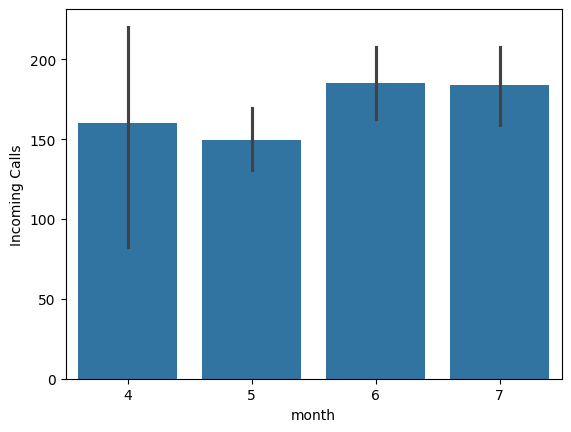

In [41]:
sns.barplot(data=forecasted_call_value,x='month',y='Incoming Calls')

<Axes: xlabel='day_of_week', ylabel='Incoming Calls'>

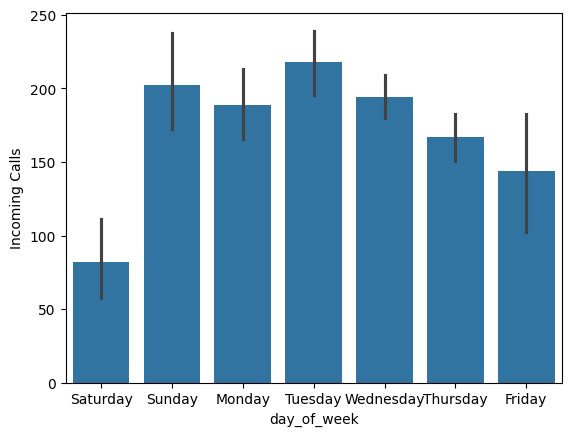

In [42]:
sns.barplot(data=forecasted_call_value,x='day_of_week',y='Incoming Calls')


**Trend**: 
- The graph shows a clear trend of incoming calls over the days of the week. 
- The number of calls is significantly lower on Saturday, with a sharp increase from Monday to Sunday, where it remains relatively consistent. 
- This suggests that the call volume is low during the weekend and increases during the weekdays.

**Seasonality**: 
- The graph does not show a clear seasonality as it only represents a single week. 
- However, if this pattern repeats over multiple weeks, it could indicate a weekly seasonality with high call volumes during the weekdays and low call volumes during the weekend.

In [43]:
forecasted_call_value['Incoming Calls'].describe()

count     90.000000
mean     171.204910
std       64.154541
min       38.267010
25%      139.121349
50%      181.826309
75%      210.598930
max      331.196259
Name: Incoming Calls, dtype: float64

In [46]:
smoothed_value = forecasted_call_value['Incoming Calls'].rolling(window=21).mean()
forecasted_call_value['smoothed_values'] = smoothed_value
import plotly.graph_objs as go
import plotly.express as px
fig = px.line(forecasted_call_value, x='Date', y='smoothed_values', title='Line Plot')

# Update layout
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Incoming calls')

# Show the plot
fig.show()

# CONCLUSION

Based on the graphs here are some insights and recommendations:

1. **Patterns and Trends**:
   - **Weekly Trend**: There is a clear weekly pattern in the call volume. The highest number of calls is received on Monday, with a significant drop on Tuesday and then relatively steady numbers from Tuesday to Friday. There is a sharp decline in calls on Saturday, and a slight increase on Sunday.
   - **Monthly Trend**: 
    - There will be  a significant increase in the number of incoming calls from May 19, 2024, to around June 16, 2024. This could be due to various factors such as changes in marketing strategies, customer behavior, or service quality.
    - After reaching a peak around June 16, the number of incoming calls fluctuates but generally remains stable without a clear upward or downward trend. This suggests that the call volume has reached a steady state after the initial increase.

2. **Resource Allocation Strategies**:
   - **Peak Times**: Allocate more resources during the peak times identified, such as **July** each year and **Mondays** each week. This could involve scheduling more staff during these times or using an automated system to handle some of the calls.
   - **Off-Peak Times**: During off-peak times, such as **Saturdays** and the months with lower call volumes, consider scheduling staff training or maintenance activities. Alternatively, this could be a good time to give weekly offs to the staff.
   - **Forecasting**: Use the identified trends and seasonality to forecast future call volumes and plan your resource allocation accordingly. For example, if the decreasing trend in call volumes continues, you might need fewer resources in the future.

3. **Actionable Insights to Reduce Call Volumes**:
   - **Identify Common Issues**: Analyze the reasons for incoming calls. If there are common issues that many customers are calling about, these could be addressed through customer education or service improvements.
   - **Customer Education**: Create resources (like FAQs, tutorials, etc.) to educate customers about common issues. This could reduce the number of calls about these issues.
   - **Service Improvements**: If calls are often about problems with your service, consider improving these aspects of your service to reduce the number of complaint calls.
